### 모두를 위한 머신러닝/딥러닝 강의
김성훈 교수님의 모두를 위한 머신러닝/딥러닝 강의 중 lab 강의 코드입니다.
## Lab11_3 CNN MNIST (Deep)
Deep structure : Conv - Pool - Conv - Pool - Conv - Conv - Conv - Global average pool - fully-connected - fully-connected

In [1]:
import os, sys
import tensorflow as tf
import numpy as np
import random
import matplotlib.pylab as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Data structures and algorithms_warm_up.ipynb',
 'Data structures and algorithms_week_1.ipynb',
 'DLEL',
 'DLEL.zip',
 'DLEL_10_1_accuracy_loss.PNG',
 'DLEL_10_1_activation_histogram.PNG',
 'DLEL_10_1_example_graph.PNG',
 'DLEL_10_1_Weight_initialization.ipynb',
 'DLEL_10_2_Drop_out.ipynb',
 'DLEL_11_2_CNN_MNIST.ipynb',
 'DLEL_11_3_CNN_MNIST_(Deep, only convolution).ipynb',
 'logs',
 'MNIST_data',
 'py-automate',
 'untitled.txt']

In [3]:
tf.set_random_seed(777)
mnist = input_data.read_data_sets(train_dir = './MNIST_data/', one_hot = True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# graph setting
X = tf.placeholder(dtype = tf.float32, shape = [None, 784])
Ximg = tf.reshape(tensor = X, shape = [-1, 28, 28, 1])
Y = tf.placeholder(dtype = tf.float32, shape = [None, 10])
# dropout (keep-prob) rate 0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(dtype = tf.float32)

# conv1 layer
with tf.variable_scope('conv1_layer'):  # (height, width, channel) -> (28,28,1) -> (28, 28, 32)
    filter_weight1 = tf.get_variable(name = 'weight1', shape = [3,3,1,32], initializer = tf.contrib.layers.xavier_initializer())
    conv1 = tf.nn.conv2d(input = Ximg, filter = filter_weight1, strides = [1,1,1,1], padding = 'SAME')
    b1 = tf.Variable(initial_value = tf.random_normal(shape = [32]), name = 'bias1')
    relu1 = tf.nn.relu(features = (conv1 + b1))
    print(relu1)

with tf.variable_scope('pool1_layer'): #(28, 28, 32) -> (14, 14, 32)
    pooled1 = tf.nn.max_pool(value = relu1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    print(pooled1)
    
with tf.variable_scope('conv2_layer'): # (14, 14, 32) -> (14, 14, 64)
    filter_weight2 = tf.get_variable(name = 'weight2', shape = [3, 3, 32, 64], initializer = tf.contrib.layers.xavier_initializer())
    conv2 = tf.nn.conv2d(input = pooled1, filter = filter_weight2, strides = [1,1,1,1], padding = 'SAME')
    b2 = tf.Variable(initial_value = tf.random_normal(shape = [64]), name = 'bias2')
    relu2 = tf.nn.relu(features = (conv2 + b2))
    print(relu2)

with tf.variable_scope('pool2_layer'): # (14, 14, 64) -> (7, 7, 64)
    pooled2 = tf.nn.max_pool(value = relu2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    print(pooled2)
    
with tf.variable_scope('conv3_layer'): # (Height, width, channel) : (7, 7, 64) -> (7, 7, 128)
    filter_weight3 = tf.get_variable(name = 'weight3', shape = [3, 3, 64, 128], initializer = tf.contrib.layers.xavier_initializer())
    conv3 = tf.nn.conv2d(input = pooled2, filter = filter_weight3, strides = [1,1,1,1], padding = 'SAME')
    b3 = tf.Variable(initial_value = tf.random_normal(shape = [128]), name = 'bias3')
    relu3 = tf.nn.relu(features = (conv3 + b3))
    print(relu3)

with tf.variable_scope('conv4_layer'): # (Height, width, channel) : (7, 7, 128) -> (7, 7, 64)  
    filter_weight4 = tf.get_variable(name = 'weight4', shape = [1, 1, 128, 64], initializer = tf.contrib.layers.xavier_initializer())
    conv4 = tf.nn.conv2d(input = relu3, filter = filter_weight4, strides = [1,1,1,1], padding = 'SAME')
    b4 = tf.Variable(initial_value = tf.random_normal(shape = [64]), name = 'bias4')
    relu4 = tf.nn.relu(features = (conv4 + b4))
    print(relu4)
    
with tf.variable_scope('conv5_layer'): # (Height, width, channel) : (7, 7, 64) -> (7, 7, 32)
    filter_weight5 = tf.get_variable(name = 'weight5', shape = [3, 3, 64, 32], initializer = tf.contrib.layers.xavier_initializer())
    conv5 = tf.nn.conv2d(input = relu4, filter = filter_weight5, strides = [1,1,1,1], padding = 'SAME')
    b5 = tf.Variable(initial_value = tf.random_normal(shape = [32]), name = 'bias5')
    relu5 = tf.nn.relu(features = (conv5 + b5))
    print(relu5)

with tf.variable_scope('conv6_layer'): # (Height, width, channel) : (7, 7, 32) -> (7, 7, 10) 
    filter_weight6 = tf.get_variable(name = 'weight6', shape = [3,3,32,10], initializer = tf.contrib.layers.xavier_initializer())
    conv6 = tf.nn.conv2d(input = relu5, filter = filter_weight6, strides = [1,1,1,1], padding = 'SAME')
    b6 = tf.Variable(initial_value = tf.random_normal(shape = [10]), name = 'bias6')
    relu6 = tf.nn.relu(features = (conv6 + b6))
    print(relu6)

with tf.variable_scope('gap'): # (Height, width, channel) : (7,7, 10) -> (1,1, 10)
    gap = tf.nn.avg_pool(value = relu6, ksize = [1,7,7,1], strides = [1,7,7,1], padding = 'SAME')
    print(gap)

# fully_connected layer
with tf.variable_scope('fully-connected_layer_1'):

    gap_vector = tf.reshape(tensor = gap, shape = [-1, 10])
    fully_weight1 = tf.get_variable(name = 'fully_weight1', shape = [10, 10], initializer = tf.contrib.layers.xavier_initializer())
    b7 = tf.Variable(initial_value = tf.random_normal(shape = [10]), name = 'bias7')
    dense_vector1 = tf.nn.relu(tf.matmul(gap_vector, fully_weight1) + b7)
    dense_vector1 = tf.nn.dropout(x = dense_vector1, keep_prob = keep_prob, name = 'drop-out')
    print(dense_vector1)    

with tf.variable_scope('fully-connected_layer_2'):

    fully_weight2 = tf.get_variable(name = 'fully_weight2', shape = [10, 10], initializer = tf.contrib.layers.xavier_initializer())
    b8 = tf.Variable(initial_value = tf.random_normal(shape = [10]), name = 'bias8')
    score = tf.matmul(dense_vector1, fully_weight2) + b8
    print(score)    
    
with tf.variable_scope('loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = score, labels = Y))
    loss_summ = tf.summary.scalar(name = 'loss', tensor = loss)
    
with tf.variable_scope('train'):
    train = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)
    
with tf.variable_scope('accuracy'):
    is_correct = tf.cast(tf.equal(tf.argmax(score, axis = 1), tf.argmax(Y, axis = 1)), dtype = tf.float32) 
    accuracy = tf.reduce_mean(is_correct)
    accuracy_summ = tf.summary.scalar(name = 'accuracy', tensor = accuracy)

Tensor("conv1_layer/Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("pool1_layer/MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("conv2_layer/Relu:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("pool2_layer/MaxPool:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("conv3_layer/Relu:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("conv4_layer/Relu:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("conv5_layer/Relu:0", shape=(?, 7, 7, 32), dtype=float32)
Tensor("conv6_layer/Relu:0", shape=(?, 7, 7, 10), dtype=float32)
Tensor("gap/AvgPool:0", shape=(?, 1, 1, 10), dtype=float32)
Tensor("fully-connected_layer_1/drop-out/mul:0", shape=(?, 10), dtype=float32)
Tensor("fully-connected_layer_2/add:0", shape=(?, 10), dtype=float32)


epoch :    0, tr_loss : 2.440, tr_acc : 62.00%, val_loss : 2.372, val_acc : 57.14%
test accuracy : 56.78%
epoch :    1, tr_loss : 0.829, tr_acc : 94.00%, val_loss : 0.565, val_acc : 93.24%
test accuracy : 93.57%
epoch :    2, tr_loss : 0.411, tr_acc : 97.00%, val_loss : 0.188, val_acc : 96.12%
test accuracy : 96.34%
epoch :    3, tr_loss : 0.311, tr_acc : 95.00%, val_loss : 0.129, val_acc : 97.10%
test accuracy : 97.07%
epoch :    4, tr_loss : 0.253, tr_acc : 99.00%, val_loss : 0.099, val_acc : 97.06%
test accuracy : 97.19%
epoch :    5, tr_loss : 0.228, tr_acc : 98.00%, val_loss : 0.090, val_acc : 97.36%
test accuracy : 97.27%
epoch :    6, tr_loss : 0.212, tr_acc : 98.00%, val_loss : 0.084, val_acc : 98.00%
test accuracy : 98.17%
epoch :    7, tr_loss : 0.195, tr_acc : 99.00%, val_loss : 0.080, val_acc : 98.04%
test accuracy : 98.09%
epoch :    8, tr_loss : 0.184, tr_acc : 99.00%, val_loss : 0.077, val_acc : 97.82%
test accuracy : 97.69%
epoch :    9, tr_loss : 0.174, tr_acc : 99.00%

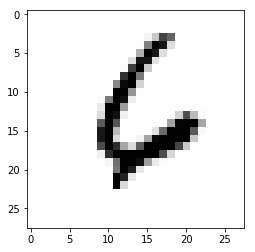

In [5]:
# parameter setting
batch_size = 100
epochs = 15
tr_loss_history = []
tr_acc_history = []
val_loss_history = []
val_acc_history = []

# launch graph
with tf.Session() as sess:
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter(logdir = './logs/CNN_MNIST/')
    writer.add_graph(sess.graph)
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for epoch in range(epochs):
        total_batch = int(mnist.train.num_examples / batch_size)
        avg_tr_loss = 0
        avg_val_loss = 0

        for step in range(total_batch):
            
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            summary, tr_loss, _ = sess.run([merged_summary, loss, train], feed_dict = {X : batch_xs, Y : batch_ys, keep_prob : 0.8})
            val_loss = sess.run(loss, feed_dict = {X : mnist.validation.images, Y : mnist.validation.labels, keep_prob : 1})
            avg_tr_loss += tr_loss / total_batch
            avg_val_loss += val_loss / total_batch
        
        tr_acc = sess.run(accuracy, feed_dict = {X : batch_xs, Y : batch_ys, keep_prob : 1})
        val_acc = sess.run(accuracy, feed_dict = {X : mnist.validation.images, Y : mnist.validation.labels, keep_prob : 1})
        
        tr_loss_history.append(avg_tr_loss)
        tr_acc_history.append(tr_acc)
        val_loss_history.append(avg_val_loss)
        val_acc_history.append(val_acc)
        writer.add_summary(summary, global_step = epoch)
        print('epoch : {:4}, tr_loss : {:.3f}, tr_acc : {:.2%}, val_loss : {:.3f}, val_acc : {:.2%}'.format(epoch, avg_tr_loss,
                                                                                                               tr_acc, avg_val_loss,
                                                                                                               val_acc))
    
        print('test accuracy : {:.2%}'.format(sess.run(accuracy, feed_dict = {X : mnist.test.images, Y : mnist.test.labels, keep_prob : 1})))
    # Get one and predict
    r = random.randint(0,mnist.test.num_examples - 1)
    print('Label : ', sess.run(tf.argmax(mnist.test.labels[r:r+1], axis = 1)))
    print('Prediction : ', sess.run(tf.argmax(score, axis = 1), feed_dict = {X : mnist.test.images[r:r+1], keep_prob : 1}))
   
    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')

### loss &  accuracy history

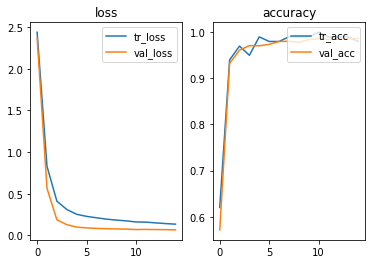

In [6]:
fig = plt.figure()
loss_history = fig.add_subplot(1,2,1)
loss_history.plot(tr_loss_history, label = 'tr_loss')
loss_history.plot(val_loss_history, label = 'val_loss')
loss_history.title.set_text('loss')
loss_history.legend(loc = 'upper right')

acc_history = fig.add_subplot(1,2,2)
acc_history.plot(tr_acc_history, label = 'tr_acc')
acc_history.plot(val_acc_history, label = 'val_acc')
acc_history.title.set_text('accuracy')
acc_history.legend(loc = 'upper right')

### structure
![Alt text](http://i.imgur.com/ckpCIl1.png)